# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


one of the most important libraries

with numpy you need to have homogeneous arrays of data

most of the time is devoted to data preparations, you can frame your data in panda dataframe, superefficient data manipulation, the user interface is easy to use, it does provide very fancy analysis tools

fancy dictionaries, data payloads but also with indexing, you can index every single column,

panda can read many different formats


All the operations that people do on databases table can be implemented in Panda, it allows to implement several functionalities

we'll start with time series-functionalities



In [2]:
import pandas as pd
import numpy as np

usually pandas is labelled as pd (just a typical convenction that people uses)

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


you have the possibility to label axes and you can store non-homogeneous elements (floats, strings, etc)

every column of a dataframe is a serie

time-series are extremely important for several reasons

modelling-> you want to make predictions about the future trend of a certain variable

framing distribution over time with TIME SERIES


In [5]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
#you put in the series a numpy array (arange(10)), and then a tuple indexing with the first 10 letters
#label+letter indexing
#payload= array of number

print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')

#it looks like a dictionary so you can pass the index and access the value at that index
print (xs['f'], xs.f, xs.h, '\n') #xs['f']==xs.f  same element at index f
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [11]:
# Extracting elements and operations: same as numpy array

print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')#you get all the elements that satisfy the condition xs>3, when it is true 

print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [15]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
#this cannot be done with numpy array!!!

# elements can be of different types!!!int, char,list ,array etc.
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

today we'll see only small amount of data, but keep in mind that these dataframes are meant to store very large amounts of data!!!

series and dataframes as well

In [21]:
#note operation happens only on the same indices,
#operations are NOT performed element wise for all the elements!!
#you do element wise operations only for elements with the same index!!!
#you can do operation with 2 series with only a few indices in common, the operation will happen only to that indices


s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

#the index a) and e) are not present in both the series, so one cannot perform operations on those indices
#for the indices that are not defined for both the series you'll have a result that IS NOT A NUMBER
#you don't want to  mix different indices

a    0.531925
b    0.106938
c    0.317910
d   -0.130944
e   -0.449489
dtype: float64
a         NaN
b    0.213876
c    0.635820
d   -0.261889
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

in order to use the series as time series from the point of view of Pandas thwere is little to do, what you need is only a library that handles time in a proper way

time can be expressed in several ways, there are first of all different convenctions to express time (ie UTC)

you can also represent visually in several different way, hh,mm,ss  or days, european way yy/dd/mm  dd/mm/yy etc
you can write the month in letters

datetime is the library you need

In [24]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

#daterange, you can provide a date range, 
#you want 7 days after the date you provide, frequency is 1 day
days = pd.date_range(date, periods=7, freq='D')
print (days)


#you want 3600 after the date you provide, frequency is 1 second
#actually you mean 1 hr after but in seconds
seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-11-30
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

you can built your own time index, but actually you'll have to open files and interpret certain elements as date 

in order to do that you can use datetime

usually the starting point is January 1st at 19.00

you can actually count from that point on with the frequency (ns,s,min,hr etc) that you want

In [34]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9)) #string containing info about date (you can imagine it inside a file)

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

a time series is just a series but the indices are datetime objects!!!

In [41]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)

#there are 7 elements (days are 7 len(days)=7), with mean 10 and stdev 1, that are indexed with days

# Extracting elements
print (tseries[0:4], '\n') #extract the 1st four
print (tseries['2022-11-30':'2022-12-01'], '\n') # you can give a range of dates
# Note - includes end time

#date time indices that index a give payload

2022-11-30 10:45:00     9.673583
2022-12-01 10:45:00    10.202193
2022-12-02 10:45:00    12.674672
2022-12-03 10:45:00    11.686159
Freq: D, dtype: float64 

2022-11-30 10:45:00     9.673583
2022-12-01 10:45:00    10.202193
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [42]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

every index can have its own type depending on the element!!

with series you have only 1D array, while with DataFrame you actually have a table of data, just like excel spreadsheet

note that from computationally pov dataframes are stored in memory!!!

this can be a problem if you have a big size dataset, you'll need to extend the concept of DataFrame divided in cluster in different computer... but you'll see it in the next semester

a Dataframe is nothing else than a collection of series

the columns of a DF are just Series!!!

Note that the series must have the same indexes that corresponds to the element of the rows

In addition you can add a name for the colums!!!

                colums==names
rows==indices





### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [47]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
#simple table, 4 colums that are each one a Serie
#the names of the columns A,B,C,D 
#the payload is 2D numpy array
#the indices are the dates
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

#if you don't provide names for colums and indicex they'll be set by default!!

#you should perceive this table as a variable that is measured several times!!
#for example you have 10 sensors that measure temperature, umidity, pressure etc...
#names for columns usually means the name of the measured variable

,A,B,C,D
2022-11-30 10:45:00,0.738013,-0.371611,-0.571341,0.817761
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,0.231497
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,0.534138
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,0.731846
2022-11-30 14:45:00,1.072293,0.738176,1.777359,0.988403
2022-11-30 15:45:00,0.511438,0.121296,0.760051,-1.337448
2022-11-30 16:45:00,0.164081,1.187672,0.969111,-1.956258
2022-11-30 17:45:00,0.049064,0.040247,0.199690,-1.545805
2022-11-30 18:45:00,0.600147,0.985340,0.023608,0.303006
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,-0.600894


or by means of a dictionary:


In [50]:
df2 = pd.DataFrame(
    { 'A' : 1.,  #initialisez by defaul same for each
      'B' : pd.Timestamp('20130102'), #timestamp
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

#we didn't defined the indices, but they're actually initialised by default 0,1,2,...

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [52]:
df.head(2) #df is the dataframe we defined before

,A,B,C,D
2022-11-30 10:45:00,0.738013,-0.371611,-0.571341,0.817761
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,0.231497


In [53]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,0.164081,1.187672,0.969111,-1.956258
2022-11-30 17:45:00,0.049064,0.040247,0.199690,-1.545805
2022-11-30 18:45:00,0.600147,0.985340,0.023608,0.303006
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,-0.600894


In [54]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [55]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [57]:
df.values #you remove indicex and names, and get the payload of data, dataONLY

array([[ 0.73801334, -0.37161127, -0.57134149,  0.81776109],
       [-0.15954971,  1.54988121, -0.37989748,  0.23149713],
       [ 1.13170655, -2.23415135,  1.07718034,  0.53413817],
       [-1.80481544, -0.46637437, -1.67619798,  0.73184636],
       [ 1.07229345,  0.73817591,  1.77735909,  0.98840336],
       [ 0.51143796,  0.1212959 ,  0.76005061, -1.33744804],
       [ 0.16408121,  1.18767193,  0.9691114 , -1.95625764],
       [ 0.0490639 ,  0.04024721,  0.19969041, -1.54580498],
       [ 0.60014706,  0.98533985,  0.02360804,  0.30300616],
       [ 1.1181028 ,  0.29513338, -0.40961374, -0.60089428]])

In [59]:
df.describe() #you should see the columns as the variables
#you'll see the statistics related to each column!

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.342048,0.184561,0.176995,-0.183375
std,0.881244,1.076947,1.000639,1.087403
min,-1.804815,-2.234151,-1.676198,-1.956258
25%,0.077818,-0.268647,-0.402185,-1.153310
50%,0.555793,0.208215,0.111649,0.267252
75%,0.988723,0.923549,0.916846,0.682419
max,1.131707,1.549881,1.777359,0.988403


In [62]:
df.T  #you can actually take the transpose of the table
#indices becomes the name of the columns and viceversa

#usually the dimensionality of your problem is defined by the number of columns
#whereas the number of entries (rows) is the statistics of the sample

#usually you'll have few columns and many rows
#so you don't need to take the transpose...

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,0.738013,-0.159550,1.131707,-1.804815,1.072293,0.511438,0.164081,0.049064,0.600147,1.118103
B,-0.371611,1.549881,-2.234151,-0.466374,0.738176,0.121296,1.187672,0.040247,0.985340,0.295133
C,-0.571341,-0.379897,1.077180,-1.676198,1.777359,0.760051,0.969111,0.199690,0.023608,-0.409614
D,0.817761,0.231497,0.534138,0.731846,0.988403,-1.337448,-1.956258,-1.545805,0.303006,-0.600894


In [64]:
df.sort_index(axis=0,ascending=True)
#you can sort values by index

,A,B,C,D
2022-11-30 10:45:00,0.738013,-0.371611,-0.571341,0.817761
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,0.231497
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,0.534138
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,0.731846
2022-11-30 14:45:00,1.072293,0.738176,1.777359,0.988403
2022-11-30 15:45:00,0.511438,0.121296,0.760051,-1.337448
2022-11-30 16:45:00,0.164081,1.187672,0.969111,-1.956258
2022-11-30 17:45:00,0.049064,0.040247,0.199690,-1.545805
2022-11-30 18:45:00,0.600147,0.985340,0.023608,0.303006
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,-0.600894


In [65]:
df.sort_index(axis=0,ascending=False)


,A,B,C,D
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,-0.600894
2022-11-30 18:45:00,0.600147,0.985340,0.023608,0.303006
2022-11-30 17:45:00,0.049064,0.040247,0.199690,-1.545805
2022-11-30 16:45:00,0.164081,1.187672,0.969111,-1.956258
2022-11-30 15:45:00,0.511438,0.121296,0.760051,-1.337448
2022-11-30 14:45:00,1.072293,0.738176,1.777359,0.988403
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,0.731846
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,0.534138
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,0.231497
2022-11-30 10:45:00,0.738013,-0.371611,-0.571341,0.817761


In [67]:
df.sort_values(by="C")
#everything is sorted according to the order of column C (from lowest to highest number in column C)
#you actually change the order between rows

,A,B,C,D
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,0.731846
2022-11-30 10:45:00,0.738013,-0.371611,-0.571341,0.817761
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,-0.600894
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,0.231497
2022-11-30 18:45:00,0.600147,0.985340,0.023608,0.303006
2022-11-30 17:45:00,0.049064,0.040247,0.199690,-1.545805
2022-11-30 15:45:00,0.511438,0.121296,0.760051,-1.337448
2022-11-30 16:45:00,0.164081,1.187672,0.969111,-1.956258
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,0.534138
2022-11-30 14:45:00,1.072293,0.738176,1.777359,0.988403


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [70]:
## standard and safe
print (df['A'],'\n')  #access to all the entries of the variable A (A is the name of the column)

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A) #can be misinterpreted if if have long names for columns with spaces!!

2022-11-30 10:45:00    0.738013
2022-11-30 11:45:00   -0.159550
2022-11-30 12:45:00    1.131707
2022-11-30 13:45:00   -1.804815
2022-11-30 14:45:00    1.072293
2022-11-30 15:45:00    0.511438
2022-11-30 16:45:00    0.164081
2022-11-30 17:45:00    0.049064
2022-11-30 18:45:00    0.600147
2022-11-30 19:45:00    1.118103
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00    0.738013
2022-11-30 11:45:00   -0.159550
2022-11-30 12:45:00    1.131707
2022-11-30 13:45:00   -1.804815
2022-11-30 14:45:00    1.072293
2022-11-30 15:45:00    0.511438
2022-11-30 16:45:00    0.164081
2022-11-30 17:45:00    0.049064
2022-11-30 18:45:00    0.600147
2022-11-30 19:45:00    1.118103
Freq: H, Name: A, dtype: float64


In [73]:
# selecting rows by counting
print (df[0:3]) #access elements of a series 

# or by index(equivalent)
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C         D
2022-11-30 10:45:00  0.738013 -0.371611 -0.571341  0.817761
2022-11-30 11:45:00 -0.159550  1.549881 -0.379897  0.231497
2022-11-30 12:45:00  1.131707 -2.234151  1.077180  0.534138
                            A         B         C         D
2022-11-30 10:45:00  0.738013 -0.371611 -0.571341  0.817761
2022-11-30 11:45:00 -0.159550  1.549881 -0.379897  0.231497
2022-11-30 12:45:00  1.131707 -2.234151  1.077180  0.534138


### Selection by label

In [75]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]  
#loc to select the single row with index dates[0]

A    0.738013
B   -0.371611
C   -0.571341
D    0.817761
Name: 2022-11-30 10:45:00, dtype: float64

In [78]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]    
#: to select all the indices
# ['A','B'] to select the columns

#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,0.738013,-0.371611
2022-11-30 11:45:00,-0.159550,1.549881
2022-11-30 12:45:00,1.131707,-2.234151
2022-11-30 13:45:00,-1.804815,-0.466374
2022-11-30 14:45:00,1.072293,0.738176
2022-11-30 15:45:00,0.511438,0.121296
2022-11-30 16:45:00,0.164081,1.187672
2022-11-30 17:45:00,0.049064,0.040247
2022-11-30 18:45:00,0.600147,0.985340
2022-11-30 19:45:00,1.118103,0.295133


A view is just like renaming your object, if you edit the view you'll edit the original data

while if you edit a copy it won't edit the original data

usually you don't want to create a copy since you'll deal with large dataframes, so it's useful to have views and not only copies

In [79]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,1.072293,0.738176
2022-11-30 15:45:00,0.511438,0.121296
2022-11-30 16:45:00,0.164081,1.187672


In [82]:
# getting an individual element
print (df.loc[dates[1],'A'])  #index, columnName

# equivalently
print (df.at[dates[1],'A'])  #loc=at equivalent

-0.15954971453469735
-0.15954971453469735


### Selecting by position

iloc access by position and not by index, it treats the indices as they are in an array

i.e. 1st index whatever name will be iloc[0]

In [87]:
# select via the position of the passed integers:
print (df.iloc[3],'\n') #print all the variables in row 4

# notation similar to numpy/python
print (df.iloc[3:5,0:2]) #print row 4,5 and column A,B 

A   -1.804815
B   -0.466374
C   -1.676198
D    0.731846
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00 -1.804815 -0.466374
2022-11-30 14:45:00  1.072293  0.738176


In [88]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.159550,-0.379897
2022-11-30 12:45:00,1.131707,1.077180
2022-11-30 14:45:00,1.072293,1.777359


In [89]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.159550  1.549881 -0.379897  0.231497
2022-11-30 12:45:00  1.131707 -2.234151  1.077180  0.534138 

                            B         C
2022-11-30 10:45:00 -0.371611 -0.571341
2022-11-30 11:45:00  1.549881 -0.379897
2022-11-30 12:45:00 -2.234151  1.077180
2022-11-30 13:45:00 -0.466374 -1.676198
2022-11-30 14:45:00  0.738176  1.777359
2022-11-30 15:45:00  0.121296  0.760051
2022-11-30 16:45:00  1.187672  0.969111
2022-11-30 17:45:00  0.040247  0.199690
2022-11-30 18:45:00  0.985340  0.023608
2022-11-30 19:45:00  0.295133 -0.409614


In [91]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]
#same thing iloc==iat

1.549881205280438

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

you can select data from dataframes with bool condition

In [97]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]
#check all the elements on column B that are greater than 0

#you'll get all the rows for which the element on column B is >0

,A,B,C,D
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,0.231497
2022-11-30 14:45:00,1.072293,0.738176,1.777359,0.988403
2022-11-30 15:45:00,0.511438,0.121296,0.760051,-1.337448
2022-11-30 16:45:00,0.164081,1.187672,0.969111,-1.956258
2022-11-30 17:45:00,0.049064,0.040247,0.199690,-1.545805
2022-11-30 18:45:00,0.600147,0.985340,0.023608,0.303006
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,-0.600894


In [99]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

#you can apply the bool condition to all the Dataframe 
#it acts elements wise, so element by element we check if the entry is >0
#when false it will return NaN as entry

#only positive entries are allowed, while the other are NaN

,A,B,C,D
2022-11-30 10:45:00,0.738013,NaN,NaN,0.817761
2022-11-30 11:45:00,NaN,1.549881,NaN,0.231497
2022-11-30 12:45:00,1.131707,NaN,1.077180,0.534138
2022-11-30 13:45:00,NaN,NaN,NaN,0.731846
2022-11-30 14:45:00,1.072293,0.738176,1.777359,0.988403
2022-11-30 15:45:00,0.511438,0.121296,0.760051,NaN
2022-11-30 16:45:00,0.164081,1.187672,0.969111,NaN
2022-11-30 17:45:00,0.049064,0.040247,0.199690,NaN
2022-11-30 18:45:00,0.600147,0.985340,0.023608,0.303006
2022-11-30 19:45:00,1.118103,0.295133,NaN,NaN


you also may want to set the elements of the table

### Setting

Combination of selection and setting of values

In [104]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

#D is not a column of my table, so it will be appended!! 
#way to create a new Column and fill it with the value 5

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [107]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

#I can define a new column and apply a function to the elements of another column and fill the new column

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,5,1.5,6,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16,0.997564
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,5,4.5,18,0.996917


In [110]:
# another example of global setting
df2=df.copy()
#create a new block on the memory to store a new copy with a different name df2

df2[df2>0] = -df2  #invert the sign of the elements that were positive (so you'll have only negative elements)
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.159550,-1.549881,-0.379897,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-1.131707,-2.234151,-1.077180,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-1.072293,-0.738176,-1.777359,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-0.511438,-0.121296,-0.760051,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-0.164081,-1.187672,-0.969111,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-0.049064,-0.040247,-0.199690,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-0.600147,-0.985340,-0.023608,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-1.118103,-0.295133,-0.409614,-5,-4.5,-18,-0.996917


In [112]:
df #unchanged since we just create and modified the copy df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,5,1.5,6,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16,0.997564
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [117]:
# Dropping by column
df.drop(['E prime'], axis=1)  
#by doing this you cannot do it permanently, it acts only locally on df

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

#you have to assign to a new dataframe the df dropped to ake the dropping permanent

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,1.000000
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,5,0.5,0.999962
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,5,1.0,0.999848
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,5,1.5,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,0.997564
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,5,4.5,0.996917


In [119]:
# Dropping by raws
# safe and always working!!
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,0,1.000000
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16,0.997564
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,5,4.5,18,0.996917


In [120]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,5,1.5,6,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16,0.997564
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,5,4.5,18,0.996917


In [121]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,5,1.5,6,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14,0.998135
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

dataframes extend numpy arrays, you can deal with missing datas and NaN

you'll have entries that are not properly formatted, NaN, missing things, etc.

In [123]:
df_wNan = df[df>0] #just create a Df with some entries that are NaN
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.549881,NaN,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.131707,NaN,1.077180,5,1.0,4.0,0.999848
2022-11-30 13:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16.0,0.997564
2022-11-30 19:45:00,1.118103,0.295133,NaN,5,4.5,18.0,0.996917


In [126]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

#whenever i have an entry containing a NaN, I'll drop that row

,A,B,C,D,E,E prime,cosine
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16.0,0.997564


In [129]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

#mask that tells you True when there is a NaN

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,True,True,False,True,True,False
2022-11-30 11:45:00,True,False,True,False,False,False,False
2022-11-30 12:45:00,False,True,False,False,False,False,False
2022-11-30 13:45:00,True,True,True,False,False,False,False
2022-11-30 14:45:00,False,False,False,False,False,False,False
2022-11-30 15:45:00,False,False,False,False,False,False,False
2022-11-30 16:45:00,False,False,False,False,False,False,False
2022-11-30 17:45:00,False,False,False,False,False,False,False
2022-11-30 18:45:00,False,False,False,False,False,False,False
2022-11-30 19:45:00,False,False,True,False,False,False,False


In [130]:
# filling missing data
df_wNan.fillna(value=0)

#instead of dropping you can fill the NaN entries with another value
#it is not safe...

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.000000,1.549881,0.000000,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.131707,0.000000,1.077180,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16.0,0.997564
2022-11-30 19:45:00,1.118103,0.295133,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [133]:
df_wNan.fillna(method='pad')
#if you have empty entries in a row, you can try to extrapolate the missing row
#extrapolate using previous and successive

#pad algorithm

#the first row is not filled since there is no element before the first line
#all the other elements have been filled

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.549881,NaN,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.131707,1.549881,1.077180,5,1.0,4.0,0.999848
2022-11-30 13:45:00,1.131707,1.549881,1.077180,5,1.5,6.0,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16.0,0.997564
2022-11-30 19:45:00,1.118103,0.295133,0.023608,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [135]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

#you can calculate the mean per colums, that is meaningful
#the mean value of the rows is not meaningfull usually since the variables is different!

A          0.268247
B          0.184561
C          0.176995
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.722435
2022-11-30 11:45:00    1.358628
2022-11-30 12:45:00    1.567798
2022-11-30 13:45:00    1.364610
2022-11-30 14:45:00    2.798174
2022-11-30 15:45:00    2.841690
2022-11-30 16:45:00    3.331356
2022-11-30 17:45:00    3.398162
2022-11-30 18:45:00    3.943808
2022-11-30 19:45:00    4.214363
Freq: H, dtype: float64 



In [137]:
# global operations on columns
df.apply(np.cumsum)
#just temporary not applied to stored data
#this cumulative sum on the colums (useful in the random walk EXERCISE!!)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.159550,1.178270,-0.951239,10,0.5,2,1.999962
2022-11-30 12:45:00,0.972157,-1.055881,0.125941,15,1.5,6,2.999810
2022-11-30 13:45:00,-0.832659,-1.522256,-1.550257,20,3.0,12,3.999467
2022-11-30 14:45:00,0.239635,-0.784080,0.227102,25,5.0,20,4.998858
2022-11-30 15:45:00,0.751073,-0.662784,0.987153,30,7.5,30,5.997906
2022-11-30 16:45:00,0.915154,0.524888,1.956264,35,10.5,42,6.996536
2022-11-30 17:45:00,0.964218,0.565135,2.155955,40,14.0,56,7.994670
2022-11-30 18:45:00,1.564365,1.550475,2.179563,45,18.0,72,8.992234
2022-11-30 19:45:00,2.682468,1.845608,1.769949,50,22.5,90,9.989152


In [138]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.371611,-0.571341,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.159550,1.549881,-0.379897,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131707,-2.234151,1.077180,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.804815,-0.466374,-1.676198,5,1.5,6,0.999657
2022-11-30 14:45:00,1.072293,0.738176,1.777359,5,2.0,8,0.999391
2022-11-30 15:45:00,0.511438,0.121296,0.760051,5,2.5,10,0.999048
2022-11-30 16:45:00,0.164081,1.187672,0.969111,5,3.0,12,0.998630
2022-11-30 17:45:00,0.049064,0.040247,0.199690,5,3.5,14,0.998135
2022-11-30 18:45:00,0.600147,0.985340,0.023608,5,4.0,16,0.997564
2022-11-30 19:45:00,1.118103,0.295133,-0.409614,5,4.5,18,0.996917


In [139]:
df.apply(lambda x: x.max() - x.min())

A           2.936522
B           3.784033
C           3.453557
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [141]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

#sum per index, index element wise sum like in array
#sum acts element by elements byut coherently per index

2022-11-30 10:45:00   -0.371611
2022-11-30 11:45:00    1.390331
2022-11-30 12:45:00   -1.102445
2022-11-30 13:45:00   -2.271190
2022-11-30 14:45:00    1.810469
2022-11-30 15:45:00    0.632734
2022-11-30 16:45:00    1.351753
2022-11-30 17:45:00    0.089311
2022-11-30 18:45:00    1.585487
2022-11-30 19:45:00    1.413236
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [147]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data


#read csv understands that the 1st row of the file was mean to indicate the names of the columns!!
#and then you'll have the entries!!
#you can deal with billion of entries
#every row is a measurement!


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's now do some operations among (elements of) columns

In [153]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

#perform the same operations for every single row
#imagine variables 3moment of a particle, for each row you'll have to do it row by row
#old school way use the for loop 
#panda is convenient because column operations are faster
#things are arranged in memory so that operation in columns are fast!
#brand new to go to every single line and use a for loop

In [152]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
5          69053.333333
6          69311.666667
7          69400.000000
8          69367.500000
9          69705.833333
10         69628.333333
11         69665.833333
12         69815.000000
13         69794.166667
14         69727.500000
15         69925.000000
16         69686.666667
17         69758.333333
18         69878.333333
19         69921.666667
20         69736.666667
21         69733.333333
22         69769.166667
23         69987.500000
24         69890.833333
25         69936.666667
26         69986.666667
27         77042.500000
28         77025.833333
29         77091.666667
               ...     
1310690    87929.166667
1310691    87917.500000
1310692    87905.833333
1310693    88036.666667
1310694    88112.500000
1310695    88195.000000
1310696    88151.666667
1310697    88127.500000
1310698      232.500000
1310699      298.333333
1310700      246

In [157]:
# the old slooow way
#very slow..... there are millions of entries
#it will take minutes!!
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

dataframes are mandatory nowadays!!

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


concatenate pieces of different datasets

In [158]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.053950,-0.388657,-0.608238,-0.605225
1,-0.163101,-0.819400,-0.704832,1.416859
2,-0.097230,-0.155363,-1.148239,-1.204800
3,-0.167427,-0.231117,0.770681,0.104555
4,-0.147786,-0.907120,-0.286072,-0.838035
5,0.289718,-1.865414,-0.534154,1.080327
6,-1.157965,-0.455568,-0.714546,-0.733105
7,2.295161,0.107101,-0.170655,0.262633
8,0.203340,-1.219940,-0.220616,-0.276616
9,0.439984,-1.286640,1.261199,-0.054157


In [159]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.053950 -0.388657 -0.608238 -0.605225
 1 -0.163101 -0.819400 -0.704832  1.416859
 2 -0.097230 -0.155363 -1.148239 -1.204800,
           0         1         2         3
 3 -0.167427 -0.231117  0.770681  0.104555
 4 -0.147786 -0.907120 -0.286072 -0.838035
 5  0.289718 -1.865414 -0.534154  1.080327
 6 -1.157965 -0.455568 -0.714546 -0.733105,
           0         1         2         3
 7  2.295161  0.107101 -0.170655  0.262633
 8  0.203340 -1.219940 -0.220616 -0.276616
 9  0.439984 -1.286640  1.261199 -0.054157]

In [160]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.053950,-0.388657,-0.608238,-0.605225
1,-0.163101,-0.819400,-0.704832,1.416859
2,-0.097230,-0.155363,-1.148239,-1.204800
3,-0.167427,-0.231117,0.770681,0.104555
4,-0.147786,-0.907120,-0.286072,-0.838035
5,0.289718,-1.865414,-0.534154,1.080327
6,-1.157965,-0.455568,-0.714546,-0.733105
7,2.295161,0.107101,-0.170655,0.262633
8,0.203340,-1.219940,-0.220616,-0.276616
9,0.439984,-1.286640,1.261199,-0.054157


In [161]:
# appending a single row (as a Series)

#you can also append only a single row
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.053950,-0.388657,-0.608238,-0.605225
1,-0.163101,-0.819400,-0.704832,1.416859
2,-0.097230,-0.155363,-1.148239,-1.204800
3,-0.167427,-0.231117,0.770681,0.104555
4,-0.147786,-0.907120,-0.286072,-0.838035
5,0.289718,-1.865414,-0.534154,1.080327
6,-1.157965,-0.455568,-0.714546,-0.733105
7,2.295161,0.107101,-0.170655,0.262633
8,0.203340,-1.219940,-0.220616,-0.276616
9,0.439984,-1.286640,1.261199,-0.054157


operations per columns are fast

while operations per rows are tricky and complicated... you typically yoou don't want to do row operations!!

summing 2 measurements by row is not so efficient

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

operations you typically want to do in databases!

in fact merging and joingin are complicated operations.....

In [162]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


you can group data satisfying a condition and the do an operation with the grouped data

very powerful but the syntax is not straightforward

In [163]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.179896,1.264111
1,bar,one,-2.064499,-0.486634
2,foo,two,-0.397846,0.981491
3,bar,three,-1.823830,1.035930
4,foo,two,0.331958,0.332363
5,bar,two,0.278376,1.262139
6,foo,one,0.248914,-1.350091
7,foo,three,-0.565915,0.515260


In [164]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-3.609953,1.811436
foo,-0.562785,1.743134


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

index that has subindices!

a 2D representation of 3D datasets

proficent users apply these functionalities a lot for complex datasets

In [165]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one       0.899196
       two      -0.278686
baz    one       0.145102
       two       0.111926
foo    one       1.718544
       two       0.559035
qux    one      -0.760819
       two      -0.034076
dtype: float64


In [166]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.064499 -0.486634
    three -1.823830  1.035930
    two    0.278376  1.262139
foo one    0.069017 -0.085980
    three -0.565915  0.515260
    two   -0.065888  1.313853

In [167]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -2.064499
            D   -0.486634
     three  C   -1.823830
            D    1.035930
     two    C    0.278376
            D    1.262139
foo  one    C    0.069017
            D   -0.085980
     three  C   -0.565915
            D    0.515260
     two    C   -0.065888
            D    1.313853
dtype: float64

## Plotting

Just a preview, more on the next lab class!

useful to plot variables, use matplotlib

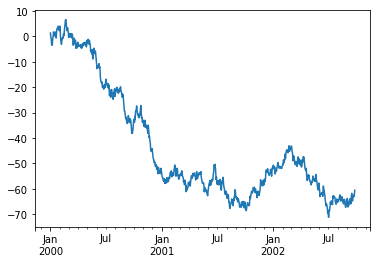

In [171]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()
#plot as function of time

<Figure size 432x288 with 0 Axes>

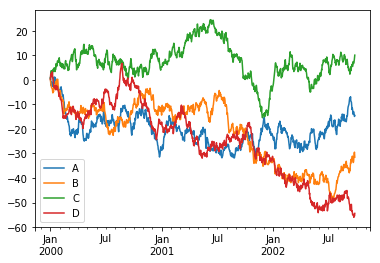

In [169]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')

#you can also plot the single distribution